# Chapter 4 - Identifying Words
품사태깅 - 단어식별

<br></br>
## 1 품사태깅
POS : Parts of Speech

https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html : Tag list

In [1]:
# Part-Of-Speech tagging(POS tagging)은 문장 내 단어들의 품사를 식별하여 태그를 붙여주는 것을 말한다.
# 튜플(tuple)의 형태로 출력되며 단어, 태그 로 출력된다. 여기서 태그는 품사(POS) 태그 이다.

### 01 nltk.pos_tag()
sentence 의 tag 붙이기

In [2]:
# token 으로 나눈다
import nltk
text = nltk.word_tokenize("It is a pleasant day today"); text

['It', 'is', 'a', 'pleasant', 'day', 'today']

In [3]:
# nltk.pos_tag() : word token list 를 삽입하면 된다
nltk.pos_tag(['It', 'is', 'a', 'pleasant', 'day', 'today'])

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('pleasant', 'JJ'),
 ('day', 'NN'),
 ('today', 'NN')]

In [4]:
# 해당 tag의 내용 확인하기
import nltk
nltk.help.upenn_tagset('NNS') # 복수주어

NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [5]:
# 정규표현식으로 tag 내용 확인하기
# 동사관련 내용들 확인
import nltk
nltk.help.upenn_tagset('VB.*')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
VBD: verb, past tense
    dipped pleaded swiped regummed soaked tidied convened halted registered
    cushioned exacted snubbed strode aimed adopted belied figgered
    speculated wore appreciated contemplated ...
VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...
VBN: verb, past participle
    multihulled dilapidated aerosolized chaired languished panelized used
    experimented flourished imitated reunifed factored condensed sheared
    unsettled primed dubbed desired ...
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
 

In [6]:
import nltk
text=nltk.word_tokenize("I cannot bear the pain of bear")
nltk.pos_tag(text)

[('I', 'PRP'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('bear', 'VB'),
 ('the', 'DT'),
 ('pain', 'NN'),
 ('of', 'IN'),
 ('bear', 'NN')]

### 02 nltk.tag.str2tuple()
sacred/VBN Ganga/NNP : text와 tag 같이붙은 단어를 나눈다 (regex)

In [7]:
import nltk
taggedword = nltk.tag.str2tuple('bear/MD'); taggedword

('bear', 'MD')

In [8]:
import nltk
sentence = '''The/DT sacred/VBN Ganga/NNP flows/VBZ in/IN this/DT region/NN 
              ./. This/DT is/VBZ a/DT pilgrimage/NN ./. People/NNP from/IN all/DT 
              over/IN the/DT country/NN visit/NN this/DT place/NN ./. '''
[nltk.tag.str2tuple(t) for t in sentence.split()]

[('The', 'DT'),
 ('sacred', 'VBN'),
 ('Ganga', 'NNP'),
 ('flows', 'VBZ'),
 ('in', 'IN'),
 ('this', 'DT'),
 ('region', 'NN'),
 ('.', '.'),
 ('This', 'DT'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('pilgrimage', 'NN'),
 ('.', '.'),
 ('People', 'NNP'),
 ('from', 'IN'),
 ('all', 'DT'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('country', 'NN'),
 ('visit', 'NN'),
 ('this', 'DT'),
 ('place', 'NN'),
 ('.', '.')]

In [9]:
# tuple2str() : tag tuple
import nltk
taggedtok = ('bear', 'NN')
from nltk.tag.util import tuple2str
tuple2str(taggedtok)

'bear/NN'

In [10]:
# treebank 말뭉치를 기준으로 연산
import nltk
from nltk.corpus import treebank
treebank_tagged = treebank.tagged_words(tagset='universal')
print('treebank_tagged :', len(treebank_tagged))

tag = nltk.FreqDist(tag    for (word, tag) in treebank_tagged)
tag.most_common(5) # count 결과를 출력

treebank_tagged : 100676


[('NOUN', 28867), ('VERB', 13564), ('.', 11715), ('ADP', 9857), ('DET', 8725)]

In [11]:
# 명사 태그전에 발생한 tag의 수를 계산
tagpairs = nltk.bigrams(treebank_tagged)
preceders_noun = [x[1] for (x, y) in tagpairs if y[1] == 'NOUN']
freqdist = nltk.FreqDist(preceders_noun)
[tag for (tag, _) in freqdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'NUM',
 'PRT',
 'CONJ',
 'PRON',
 'X',
 'ADV']

In [12]:
# 기본적인 tuple 생성
tag={}
tag['beautiful']='ADJ'
tag['boy']='N'
tag['read']='V'
tag['generously']='ADV'
tag

{'beautiful': 'ADJ', 'boy': 'N', 'generously': 'ADV', 'read': 'V'}

### 03 기본태깅
DefaultTagger

In [13]:
# 사용자가 특정한 tag를 첨부
from nltk.tag import DefaultTagger
tag = DefaultTagger('NN')
tag.tag(['Beautiful', 'morning'])

[('Beautiful', 'NN'), ('morning', 'NN')]

In [14]:
# tag 포함된 tuple의 tag를 삭제하
from nltk.tag import untag
untag([('beautiful', 'NN'), ('morning', 'NN')])

['beautiful', 'morning']

<br></br>
## 2 POS-tagged corpors 생성하기
corpora : 말뭉치의 집합

In [15]:
# ~/nltkdoc 폴더를 생성
import nltk, os,os.path
create = os.path.expanduser('~/nltkdoc')
# 폴더 존재 확인
if not os.path.exists(create):
    os.mkdir(create)
print(os.path.exists(create))
# 폴더내 데이터 .txt 확인  
import nltk.data
print(create in nltk.data.path)

True
False


In [16]:
# text 파일 불러오기 (nltk.data.load 는 모듈내부의 text만 추출)
import nltk.data
nltk.data.load('./data/adam_smith.txt',format='raw')[:300]

b'\xef\xbb\xbfThe Project Gutenberg EBook of An Inquiry into the Nature and Causes of\r\nthe Wealth of Nations, by Adam Smith\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenbe'

In [17]:
# names 말뭉치 활용
from nltk.corpus import names
print(names.fileids())  # 여성이름/ 남성이름 샘플을 불러온다
print('male.txt   len({}) : {}'.format(len(names.words('male.txt')), names.words('male.txt')[:10]))
print('female.txt len({}) : {}'.format(len(names.words('female.txt')), names.words('female.txt')[:10]))

['female.txt', 'male.txt']
male.txt   len(2943) : ['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim']
female.txt len(5001) : ['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale']


In [18]:
# words 말뭉치 활용
from nltk.corpus import words
print(words.fileids())
print('en      :', len(words.words('en')))
print('en-basic:',len(words.words('en-basic')))

['en', 'en-basic']
en      : 235886
en-basic: 850


<br></br>
## 3 기계학습 알고리즘
rule-based, probabilistic (태깅규칙, 확률) 규칙기반 알고리즘

In [19]:
# nltk.tag 관련 모듈 중
# FastBrillTaggerTrainer, SymmetricProximateTokensTemplate 가 없음

from nltk.tag import UnigramTagger
#from nltk.tag import FastBrillTaggerTrainer
#from nltk.tag.brill import SymmetricProximateTokensTemplate

In [20]:
#from nltk.tag.brill import ProximateTokensTemplate
#from nltk.tag.brill import ProximateTagsRule
#from nltk.tag.brill import ProximateWordsRule
# ctx = [ # Context = surrounding words and tags.
#     SymmetricProximateTokensTemplate(ProximateTagsRule, (1, 1)),
#     SymmetricProximateTokensTemplate(ProximateTagsRule, (1, 2)),
#     SymmetricProximateTokensTemplate(ProximateTagsRule, (1, 3)),
#     SymmetricProximateTokensTemplate(ProximateTagsRule, (2, 2)),
#     SymmetricProximateTokensTemplate(ProximateWordsRule, (0, 0)),
#     SymmetricProximateTokensTemplate(ProximateWordsRule, (1, 1)),
#     SymmetricProximateTokensTemplate(ProximateWordsRule, (1, 2)),
#     ProximateTokensTemplate(ProximateTagsRule, (-1, -1), (1, 1)),]
#tagger = UnigramTagger(sentence)
#tagger = FastBrillTaggerTrainer(tagger, ctx, trace=0)
#tagger = tagger.train(sentences, max_rules=100)

<br></br>
## 4 n-gram 접근법과 관련된 통계 모델링
UnigramTagger

### 01 UnigramTagger 의 훈련 및 검증
UnigramTagger를 활용한 overriding (상속받은 내용을 보완하여 적용)

In [21]:
# TreeBank 말뭉치의 7,000개 문장을 훈련
import nltk
from nltk.tag import UnigramTagger
from nltk.corpus import treebank
training = treebank.tagged_sents()[:7000]
testing = treebank.tagged_sents()[2000:]
treebank.sents()[0]              # tag제거한 word만 출력

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [22]:
unitagger = UnigramTagger(training) # train 훈련 시행
print(unitagger)
unitagger.tag(treebank.sents()[0]) # tag를 붙여서 출력

<UnigramTagger: size=12408>


[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [23]:
# treebank.sents()[0]              # tag제거한 word만 출력
unitagger.tag(treebank.sents()[0]) # tag를 붙여서 출력

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [24]:
unitagger.evaluate(testing)         # test를 활용평가 (정확도 측정)

0.9619024159944167

In [25]:
# Train 목록이 유일하게 {'Vinken': 'NN'} 1개 존재시
# 사용자정의 신조어 단어들의 전처리용 훈련의 용도로 활용
unitag = UnigramTagger(model={'Vinken': 'NN', '61':'KK'})
unitag.tag(treebank.sents()[0])

[('Pierre', None),
 ('Vinken', 'NN'),
 (',', None),
 ('61', 'KK'),
 ('years', None),
 ('old', None),
 (',', None),
 ('will', None),
 ('join', None),
 ('the', None),
 ('board', None),
 ('as', None),
 ('a', None),
 ('nonexecutive', None),
 ('director', None),
 ('Nov.', None),
 ('29', None),
 ('.', None)]

In [26]:
# cut-off : 발생 빈도를 사용하여 태그를 결정
# 최소 임계빈도값을 cut-off에 전달 (5번 이상 발생해야 유효 tag로 인식)
unitagger = UnigramTagger(training, cutoff=15)
print(unitagger)
unitagger.evaluate(testing)

<UnigramTagger: size=696>


0.6851817640659318

In [27]:
# Train 모델을 만들고, None 타입은 Backoff 방식으로 보완
# back-off tagging을 테스트
# 다른 프로세서와의 통신시 정상적인 흐름이 되지 않을 때 일정 시간동안 특정 간격으로 같은 데이터를 재 요청
from nltk.tag import UnigramTagger, DefaultTagger

# from nltk.corpus import treebank
# training = treebank.tagged_sents()[:7000]
# testing  = treebank.tagged_sents()[2000:]
tag1 = DefaultTagger('NN')
print(tag1)
tag2 = UnigramTagger(training, backoff = tag1)  # Train 모델을 만들고, None 타입은 Backoff 방식으로 보완하라
print(tag2)  # back-off 모델 보완결과 오히려 Size는 축소
tag2.evaluate(testing)

<DefaultTagger: tag=NN>
<UnigramTagger: size=10218>


0.9619024159944167

In [28]:
# 결론
# 자연어의 Train은 (UnigramTagger) Dict 타입을 관리하는 함수에 불과
# 반면 Evaluation, Smoothing시 Back off 등의 이론을 자연어에 적용하기 쉽게 만든것이 핵심!!

### 01-2 Back-off 성능의 비교
BigramTagger, TrigramTagger ,UnigramTagger 별 정확도 측정 및 비교

In [29]:
from nltk.tag import BigramTagger, TrigramTagger ,UnigramTagger, DefaultTagger

tag_1 = UnigramTagger(training, backoff = tag1)  # Train 모델을 만들고, None 타입은 Backoff 방식으로 보완하라
tag_2 = BigramTagger(training, backoff = tag1)  # Train 모델을 만들고, None 타입은 Backoff 방식으로 보완하라
tag_3 = TrigramTagger(training, backoff = tag1)  # Train 모델을 만들고, None 타입은 Backoff 방식으로 보완하라
print('Uni-gram Back-off :', round(tag_1.evaluate(testing),5))
print('Bi -gram Back-off :', round(tag_2.evaluate(testing),5))
print('Tri-gram Back-off :', round(tag_3.evaluate(testing),5))

Uni-gram Back-off : 0.9619
Bi -gram Back-off : 0.98148
Tri-gram Back-off : 0.97695


### 02 BigramTagger 의 훈련 및 검증
BigramTagger

In [30]:
from nltk.tag import BigramTagger
# from nltk.corpus import treebank
# training = treebank.tagged_sents()[:7000]
# testing = treebank.tagged_sents()[2000:]
bigramtagger = BigramTagger(training) # BigramTagger 훈련
bigramtagger.tag(treebank.sents()[0])

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [31]:
# BigramTagger 검증
bigramtagger.evaluate(testing)

0.9171131227292321

### 03 BigramTagger , TrigramTagger.. etc 를 활용한 학습
BigramTagger, TrigramTagger

In [32]:
# BigramTagger, TrigramTagger 를 훈련 및 검증비교
from nltk.tag import BigramTagger, TrigramTagger

# from nltk.corpus import treebank
# training  = treebank.tagged_sents()[:7000]
# testing   = treebank.tagged_sents()[2000:]
bigramtag = BigramTagger(training)
trigramtag = TrigramTagger(training)
print('bi-gram  tag :',bigramtag.evaluate(testing))
print('tri-gram tag :',trigramtag.evaluate(testing))

bi-gram  tag : 0.9171131227292321
tri-gram tag : 0.9022107272615308


In [33]:
# quadgramtag 를 훈련 및 검증
from nltk import NgramTagger

# from nltk.corpus import treebank
# training= treebank.tagged_sents()[:7000]
# testing = treebank.tagged_sents()[2000:]
quadgramtag = NgramTagger(4, training)
quadgramtag.evaluate(testing)

0.9304554878173943

### 04 affixtag로 학습 및 검증
affixtag : affix(붙이다) 접두사, 접미사를 사용한 Context Tagger

In [34]:
# affixtag : 접두사, 점미사를 활용한 학습 및 검증
from nltk.tag import AffixTagger

# from nltk.corpus import treebank
# training= treebank.tagged_sents()[:7000]
# testing = treebank.tagged_sents()[2000:]
affixtag = AffixTagger(training)
print(affixtag)
affixtag.evaluate(testing)

<AffixTagger: size=1677>


0.2902682841718497

In [35]:
# affixtag : (+4) 4개의 접두사 묶어서 학습 및 검증
from nltk.tag import AffixTagger

# from nltk.corpus import treebank
# training= treebank.tagged_sents()[:7000]
# testing = treebank.tagged_sents()[2000:]
prefixtag = AffixTagger(training, affix_length = 4)
print(prefixtag)
prefixtag.evaluate(testing)

<AffixTagger: size=3940>


0.2094751318841472

In [36]:
# affixtag : (-3) 3개의 접미사 묶어서 학습 및 검증
prefixtag = AffixTagger(training, affix_length = 3)
print(prefixtag)
prefixtag.evaluate(testing)

<AffixTagger: size=2484>


0.25699447831352507

In [37]:
# affitag 를 back-off chain 로 학습 및 검증
# training= treebank.tagged_sents()[:7000]
# testing = treebank.tagged_sents()[2000:]

prefixtagger = AffixTagger(training, affix_length = 4)
print(prefixtagger)
prefixtagger3 = AffixTagger(training,affix_length = 3, backoff = prefixtagger)
print(prefixtagger3)
prefixtagger3.evaluate(testing)

<AffixTagger: size=3940>
<AffixTagger: size=1461>


0.25841082168442225

In [38]:
suffixtagger3 = AffixTagger(training, affix_length = -3, backoff = prefixtagger3)
print(suffixtagger3)
suffixtagger3.evaluate(testing)

<AffixTagger: size=676>


0.2940451998275756

In [39]:
suffixtagger4 = AffixTagger(training, affix_length = -4, backoff = suffixtagger3)
print(suffixtagger4)
suffixtagger4.evaluate(testing)

<AffixTagger: size=1288>


0.33072644046226163

### 05 Trigram n Tags - 2차 마르코프모델을 기반한 학습
Trigram n Tags 

In [40]:
from time import time
from nltk.tag import tnt
# from nltk.corpus import treebank
# training= treebank.tagged_sents()[:7000]
# testing = treebank.tagged_sents()[2000:]
tnt_tagger = tnt.TnT(); t0 = time()
tnt_tagger.train(training); t1 = time()
print(tnt_tagger.evaluate(testing)); t2 = time()
print('Training  : {}min  {}sec'.format(int((t1-t0)//60), round((t1-t0)%60),2))
print('evaluation: {}min  {}sec'.format(int((t2-t1)//60), round((t2-t1)%60),2))

0.9882176652913768
Training  : 0min  2sec
evaluation: 3min  12sec


<br></br>
## 5 pos-tagged data를 사용한 chunker 개발
덩이짓기(Chunking, 청킹)는 정보를 의미있는 묶음으로 만드는 것으로, chunker를 설계 및 수행

### 01 명사구문을 대상으로 Chunking
Noun Pharse

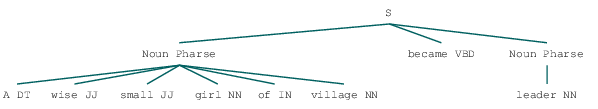

In [2]:
import nltk
sent = [("A","DT"),("wise", "JJ"), ("small", "JJ"),("girl", "NN"), 
        ("of", "IN"), ("village", "N"),  ("became", "VBD"), ("leader", "NN")]
sent = [("A","DT"),("wise", "JJ"), ("small", "JJ"),("girl", "NN"), 
        ("of", "IN"), ("village", "NN"),  ("became", "VBD"), ("leader", "NN")]

# 명사구문 Chunking 
# DT : 선택사항(<DT>?)
# JJ : 임의사항(<JJ>*)
# NN : 다음연결(<NN>)
# IN : 선택사항(<IN>?)
# NN : 임의사항(<NN>*)
grammar = "Noun Pharse: {<DT>?<JJ>*<NN><IN>?<NN>*}"
find = nltk.RegexpParser(grammar)
res = find.parse(sent)
res

In [42]:
#res.draw()

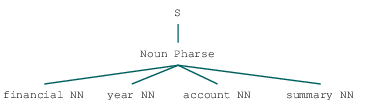

In [3]:
import nltk
noun1 = [("financial","NN"),("year","NN"),("account","NN"),("summary","NN")]

# 임의의 명사수를 기준으로 명사구문 청크규칙을 적용
gram = "Noun Pharse:{<NN>+}"
find = nltk.RegexpParser(gram)
find.parse(noun1)

In [44]:
# x = find.parse(noun1)
# x.draw()

### 02 동사구문을 대상으로 Chunking
Verb Pharse

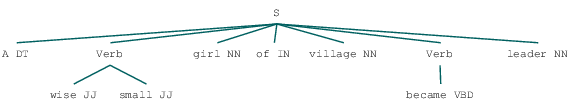

In [5]:
import nltk
sent = [("A","DT"),("wise", "JJ"), ("small", "JJ"),("girl", "NN"), 
        ("of", "IN"), ("village", "N"),  ("became", "VBD"), ("leader", "NN")]
sent = [("A","DT"),("wise", "JJ"), ("small", "JJ"),("girl", "NN"), 
        ("of", "IN"), ("village", "NN"),  ("became", "VBD"), ("leader", "NN")]

# 명사구문 Chunking 
# DT : 선택사항(<DT>?)
# JJ : 임의사항(<JJ>*)
# NN : 다음연결(<NN>)
# IN : 선택사항(<IN>?)
# NN : 임의사항(<NN>*)
grammar = "Verb : {<VBD>?<JJ>*}"
find = nltk.RegexpParser(grammar)
res = find.parse(sent)
res